In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import os
import re
import string
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_csv('malwares.csv')

In [3]:
df.head()

,ID,LOCATION,TYPE,NAME,VERSION,AUTHOR,LANGUAGE,DATE,ARCHITECTURE,PLATFORM,VIP,COMMENTS,TAGS
0,1,malwares/Source/Original/Dokan_Dec2008,botnet,Dokan,NaN,NaN,c,00/12/2008,x86,win32,0,NaN,Source
1,2,malwares/Source/Original/ExploitKit.Crimepack....,exploitkit,Crimepack,3.1.3,NaN,php,NaN,web,win32,0,NaN,Source
2,3,malwares/Source/Original/ShadowBotv3_March2007,botnet,ShadowBot,3,NaN,cpp,00/03/2007,x86,win32,0,NaN,Source
3,4,malwares/Source/Original/rBot0.3.3_May2004,botnet,rBot,0.3.3,NaN,cpp,00/05/2004,x86,win32,1,NaN,Source
4,5,malwares/Source/Original/ZeuS2.0.8.9_Feb2013,botnet,ZeuS,2.0.8.9,NaN,c,00/02/2013,x86,win32,0,NaN,Source


In [4]:
df = df[df.LOCATION.str.match('malwares/Binaries*')]

In [5]:
df = df[['LOCATION','NAME','TYPE']]

In [6]:
# df['FEATURES'] = pd.Series(0)

In [7]:
data = []

In [8]:
df = df.dropna()

In [9]:
def convert_malware_to_np_array(name):
    files = [f for f in os.listdir('data') if re.match(r'.*{}.*'.format(name.lower()), f.lower())]
    
    global labels
    
    data = []
    for file in files:
        temp = np.fromfile(os.path.join('data',file), dtype=np.uint8)
        
        if temp.shape[0] > 20736:
            temp = temp[:20736]
        else:
            temp = np.pad(temp, (0, 20736-temp.shape[0]), 'constant', constant_values=0)
        temp = temp * (255.0/temp.max())
        
        temp = np.resize(temp, (144,144))
#         temp = scipy.misc.imresize(temp, (250,250))

        data.append(temp)
        labels.append(name)
    
    return data

In [10]:
data = []
labels = []

for name in set(df.NAME.str.translate(None, string.whitespace).str.lower()):
#     print name.lower()
    data += convert_malware_to_np_array(name)

In [11]:
y = []
for label in labels:
    mal_type = df[df.NAME.str.translate(None, string.whitespace).str.lower() == label.lower()].TYPE.values[0]
#     print label, mal_type
    y.append(mal_type)

In [12]:
data = np.concatenate(data, axis=0)

In [13]:
data = data.reshape(251, -1)

In [14]:
data.shape

(251, 20736)

apt -> 0
botnet -> 1
ransomware -> 2
rootkit -> 3
trojan -> 4
worm -> 5

In [15]:
y = pd.get_dummies(y).values.argmax(1)

In [16]:
data.shape, y.shape

((251, 20736), (251,))

In [17]:
indices = np.random.choice(y.shape[0],y.shape[0])
X = data[indices]
y = y[indices]

In [18]:
np.save('X',X)
np.save('y',y)

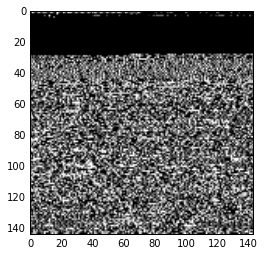

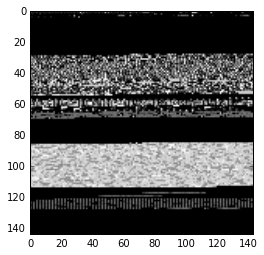

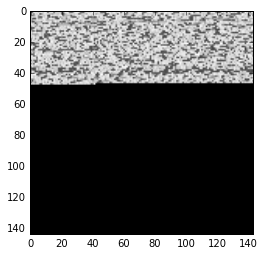

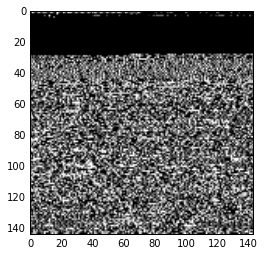

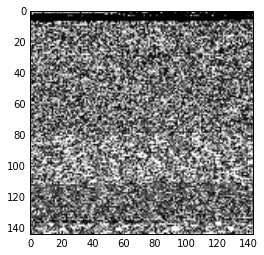

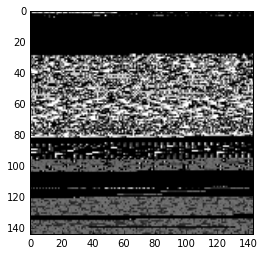

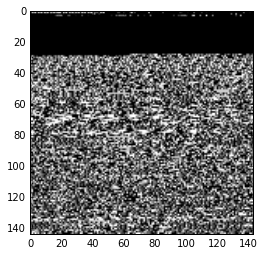

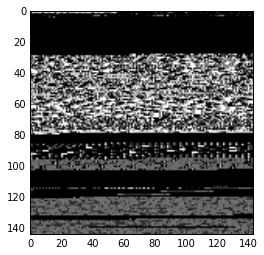

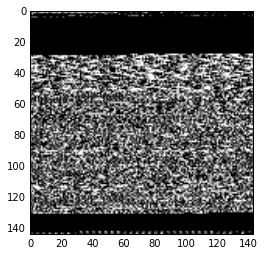

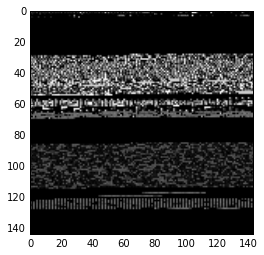

In [21]:
for i in range(55,65):
    plt.figure()
    plt.imshow(data[i].reshape(144,144), cmap="gray")

In [3]:
np.random.choice(128,10)

array([ 96,   6, 101,  11,  74,  23,   3,  96,  17,  95])